In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import spiir

In [3]:
data_dir = Path("/fred/oz016/dtang/packages/spiir/share/data/pipeline/")
coinc_xml = data_dir / "../misc/H1L1V1_1344284404_273_202.xml"

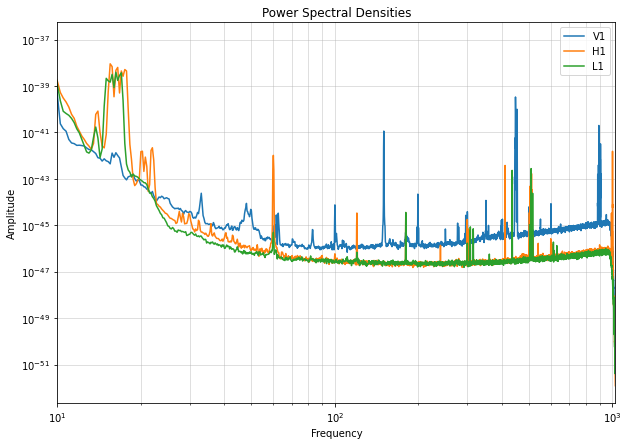

In [4]:
psds = spiir.io.ligolw.array.load_psd_series_from_xml(coinc_xml)
psds = pd.concat(psds, axis=1)

fig, ax = plt.subplots(figsize=(10, 7))
psds.plot(title="Power Spectral Densities", ax=ax, logx=True, logy=True)
ax.set(xlim=(10, psds.index.max()), xlabel="Frequency", ylabel="Amplitude")
ax.grid(which="both", axis="both", alpha=0.5)
fig.show()

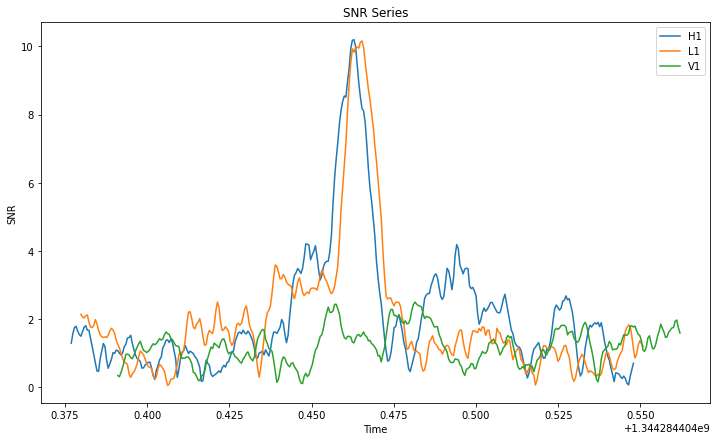

In [5]:
snrs = spiir.io.ligolw.array.load_snr_series_from_xml(coinc_xml)
snrs = pd.concat(snrs, axis=1)
network_snr = snrs.apply(lambda snr: np.sqrt(np.real(snr)**2 + np.imag(snr)**2), axis=0)
network_snr.plot(title="SNR Series", figsize=(12, 7), xlabel="Time", ylabel="SNR");

In [6]:
data = spiir.io.ligolw.load_coinc_xml(coinc_xml)
for key in data:
    for name in data[key]:
        print(f"{key}: {name} ({type(data[key][name])})")

tables: process (<class 'pandas.core.frame.DataFrame'>)
tables: process_params (<class 'pandas.core.frame.DataFrame'>)
tables: sngl_inspiral (<class 'pandas.core.frame.DataFrame'>)
tables: coinc_definer (<class 'pandas.core.frame.DataFrame'>)
tables: coinc_event (<class 'pandas.core.frame.DataFrame'>)
tables: coinc_event_map (<class 'pandas.core.frame.DataFrame'>)
tables: time_slide (<class 'pandas.core.frame.DataFrame'>)
tables: coinc_inspiral (<class 'pandas.core.frame.DataFrame'>)
tables: postcoh (<class 'pandas.core.frame.DataFrame'>)
psds: V1 (<class 'pandas.core.series.Series'>)
psds: H1 (<class 'pandas.core.series.Series'>)
psds: L1 (<class 'pandas.core.series.Series'>)
snrs: H1 (<class 'pandas.core.series.Series'>)
snrs: L1 (<class 'pandas.core.series.Series'>)
snrs: V1 (<class 'pandas.core.series.Series'>)


In [7]:
data = spiir.io.ligolw.load_coinc_xml(coinc_xml)
data.keys()

dict_keys(['tables', 'psds', 'snrs'])

In [8]:
p_astro = {"BBH": 0.6, "BNS": 0.05, "NSBH": 0.0, "Terrestrial": 0.35}
spiir.io.ligolw.save_coinc_xml("test.xml", **data, p_astro=p_astro)

In [9]:
data = spiir.io.ligolw.load_coinc_xml("test.xml")
data.keys()

dict_keys(['tables', 'psds', 'snrs', 'p_astro'])

In [10]:
data["p_astro"]  # LIGO_LW params in xml file require lower case keys

{'bbh': 0.6, 'bns': 0.05, 'nsbh': 0.0, 'terrestrial': 0.35}

In [11]:
# xmldoc = spiir.io.ligolw.load_ligolw_xmldoc("test.xml", nullable=False)
# arrays = spiir.io.ligolw.get_arrays_from_xmldoc(xmldoc)
# tables = spiir.io.ligolw.get_tables_from_xmldoc(xmldoc)
# psds = spiir.io.ligolw.array.build_psd_series_from_xmldoc(xmldoc)
# snrs = spiir.io.ligolw.array.build_snr_series_from_xmldoc(xmldoc)
# data = {**tables, "psds": psds, "snrs": snrs}

In [13]:
bbh_run_dir = Path("/fred/oz016/dtang/analysis/pastro/injection/bbh/bbh_inj_1257992907-604800-created_06-10-22_21-59-11")
zerolags = spiir.io.ligolw.load_tables_from_xmls(
    list(bbh_run_dir.glob("*.xml")),
    tables={"postcoh": None, "sngl_inspiral": None, "coinc_inspiral": None},
    nproc=4,
    verbose=True,
)

Loading tables from LIGOLW XML files: 100%|██████████| 2560/2560 [01:02<00:00, 40.76it/s]


In [ ]:
# inputs

# outputs
coinc_paths = list(data_dir.glob("coinc/*.xml"))
marginalized_stats_paths = list(data_dir.glob("HL_000/*_marginalized_stats_*.xml.gz"))
bank_stats_path = list(data_dir.glob("HL_000/bank*_stats_*.xml.gz"))[0]
zerolags_path = list(data_dir.glob("HL_000/*_zerolag_*.xml.gz"))[0]
# ifos = ("H1", "L1")

# detrsp_map_arrays = spiir.io.ligolw.load_arrays_from_xmls(detrsp_map_path)
# prob_map_arrays = list(data_dir.glob("artifacts/*_prob_map.xml"))[0]
# psd_arrays = list(data_dir.glob("artifacts/*-REF_PSD-*.xml.gz"))[0]

# outputs
# coinc_paths = list(data_dir.glob("coinc/*.xml"))
# marginalized_stats_paths = list(data_dir.glob("HL_000/*_marginalized_stats_*.xml.gz"))
# bank_stats_patha = list(data_dir.glob("HL_000/bank*_stats_*.xml.gz"))[0]
# zerolags_path = list(data_dir.glob("HL_000/*_zerolag_*.xml.gz"))[0]
# segments_path = list(data_dir.glob("HL_000/*_SEGMENTS_*.xml.gz"))[0]

In [32]:
bank_paths = list(data_dir.glob("artifacts/banks/*.xml.gz"))[0]
bank_data = spiir.io.ligolw.load_tables_from_xmls(bank_paths)

In [33]:
detrsp_map_path = list(data_dir.glob("artifacts/*_detrsp_map.xml"))[0]
detrsp_map = spiir.io.ligolw.load_arrays_from_xmls(detrsp_map_path)

In [34]:
prob_map_path = list(data_dir.glob("artifacts/*_prob_map.xml"))[0]
prob_map = spiir.io.ligolw.load_arrays_from_xmls(prob_map_path)

In [35]:
segments_path = list(data_dir.glob("HL_000/*_SEGMENTS_*.xml.gz"))[0]
segments_data = spiir.io.ligolw.load_tables_from_xmls(segments_path)

In [29]:
psd_path = list(data_dir.glob("artifacts/*-REF_PSD-*.xml.gz"))[0]
psd_data = spiir.io.ligolw.array.load_psd_series_from_xml(psd_path)

In [31]:
coinc_paths = list(data_dir.glob("coinc/*.xml"))
coincs_data = spiir.io.ligolw.load_tables_from_xmls(coinc_paths, verbose=True)

Loading tables from LIGOLW XML files: 100%|██████████| 11/11 [00:00<00:00, 11.25it/s]


In [44]:
marginalized_stats_paths = list(data_dir.glob("HL_000/*_marginalized_stats_*.xml.gz"))[0]  # 1d, 2h, 1w
marginalized_stats_tables = spiir.io.ligolw.load_tables_from_xmls(marginalized_stats_paths, verbose=True)
marginalized_stats_arrays = spiir.io.ligolw.load_arrays_from_xmls(marginalized_stats_paths, verbose=True)

In [46]:
for key in marginalized_stats_arrays:
    print(f"{key}: {marginalized_stats_arrays[key].shape}")

background_feature:H1_lgsnr_rate: (300,)
background_feature:H1_lgchisq_rate: (300,)
background_feature:H1_lgsnr_lgchisq_rate: (300, 300)
background_feature:H1_lgsnr_lgchisq_pdf: (300, 300)
background_rank:H1_rank_map: (300, 300)
background_rank:H1_rank_rate: (300,)
background_rank:H1_rank_pdf: (300,)
background_rank:H1_rank_fap: (300,)
background_feature:L1_lgsnr_rate: (300,)
background_feature:L1_lgchisq_rate: (300,)
background_feature:L1_lgsnr_lgchisq_rate: (300, 300)
background_feature:L1_lgsnr_lgchisq_pdf: (300, 300)
background_rank:L1_rank_map: (300, 300)
background_rank:L1_rank_rate: (300,)
background_rank:L1_rank_pdf: (300,)
background_rank:L1_rank_fap: (300,)
background_feature:H1L1_lgsnr_rate: (300,)
background_feature:H1L1_lgchisq_rate: (300,)
background_feature:H1L1_lgsnr_lgchisq_rate: (300, 300)
background_feature:H1L1_lgsnr_lgchisq_pdf: (300, 300)
background_rank:H1L1_rank_map: (300, 300)
background_rank:H1L1_rank_rate: (300,)
background_rank:H1L1_rank_pdf: (300,)
backgrou

In [42]:
bank_stats_path = list(data_dir.glob("HL_000/bank*_stats_*.xml.gz"))[0]
bank_stats_tables = spiir.io.ligolw.load_tables_from_xmls(bank_stats_path, verbose=True)
bank_stats_arrays = spiir.io.ligolw.load_arrays_from_xmls(bank_stats_path, verbose=True)

In [43]:
zerolags_path = list(data_dir.glob("HL_000/*_zerolag_*.xml.gz"))[0]
zerolags_tables = spiir.io.ligolw.load_tables_from_xmls(zerolags_path, verbose=True)